In [17]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [18]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.2
3.3


In [19]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,

)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [20]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [21]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [22]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [23]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x000001E9BEEFF4C0>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x000001E9BEEFF4C0>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x000001E9BEEFF4C0>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x000001E9BEEFF4C0>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x000001E9BEEFF4C0>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x000001E9BEEFF4C0>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [24]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:19<00:00, 10.35it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [25]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,35,46.151948,1.0,0.418172,213.734772,1.0,0.239841,121.890348,1.5,0.995246,...,0,4,4,3,10,6,2,158,154,dikesnet
1,69,213.604276,1.0,0.535521,326.842900,1.0,0.003404,292.478491,10.0,0.780966,...,0,4,4,3,10,6,2,159,154,dikesnet
2,89,237.918202,10.0,0.435853,291.355423,1.5,0.668494,243.182365,1.0,0.940557,...,0,4,4,3,10,6,2,160,154,dikesnet
3,50,114.850964,10.0,0.078306,176.979982,1.0,0.914051,200.593839,1.5,0.417640,...,0,4,4,3,10,6,2,161,154,dikesnet
4,107,218.398231,1.0,0.983562,31.397571,1.0,0.982504,138.396233,1.0,0.311102,...,0,4,4,3,10,6,2,162,154,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,109,241.496897,1.5,0.197729,238.486292,1.5,0.479579,254.876426,1.5,0.014068,...,6,6,7,8,0,8,1,203,157,dikesnet
196,87,205.812239,1.0,0.807345,182.157459,1.0,0.659771,235.711720,1.0,0.692191,...,6,6,7,8,0,8,1,204,157,dikesnet
197,75,261.253969,10.0,0.675556,197.918233,1.0,0.184954,97.755587,1.0,0.604331,...,6,6,7,8,0,8,1,205,157,dikesnet
198,3,344.079767,1.5,0.730897,259.493786,10.0,0.325798,79.688811,1.5,0.280794,...,6,6,7,8,0,8,1,206,157,dikesnet


In [26]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,2.181322e+08,0.0,1.922237e+08,0.000000,1.034875e+08,0.000000,2.198261e+07,0.000098,1.958874e+08,0.005156,6.258000e+08,1988.089425
1,2.181322e+08,0.0,2.360918e+08,0.005683,1.034875e+08,0.000000,2.078505e+07,0.000000,1.980297e+08,0.005267,6.258000e+08,3897.412320
2,2.181322e+08,0.0,1.922237e+08,0.000000,1.034875e+08,0.000000,2.602052e+07,0.000300,1.570315e+08,0.000000,6.258000e+08,221.691483
3,2.181322e+08,0.0,1.922237e+08,0.000000,1.034875e+08,0.000000,5.616154e+07,0.001863,1.696057e+08,0.001214,6.258000e+08,2164.397050
4,2.181322e+08,0.0,1.922237e+08,0.000000,1.034875e+08,0.000000,2.170894e+07,0.000093,1.570315e+08,0.000000,6.258000e+08,59.765697
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.576980e+08,0.0,1.952327e+08,0.001381,2.831182e+08,0.128496,4.932829e+07,0.000000,1.118733e+08,0.000000,1.742800e+09,5452.693116
196,1.576980e+08,0.0,1.925815e+08,0.000741,5.892684e+07,0.000000,4.932829e+07,0.000000,1.118733e+08,0.000000,1.742800e+09,54.015949
197,1.576980e+08,0.0,2.050961e+08,0.004572,5.892684e+07,0.000000,4.932829e+07,0.000000,1.118733e+08,0.000000,1.742800e+09,357.580292
198,1.576980e+08,0.0,2.003880e+08,0.002413,5.892684e+07,0.000000,4.932829e+07,0.000000,1.118733e+08,0.000000,1.742800e+09,180.478623


In [27]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [28]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:36<00:00,  8.17it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [29]:
experiments, outcomes = results

In [32]:
# only works because we have scalar outcomes
df =pd.DataFrame(outcomes)
df

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.000000,1.521789e+07,0.014060,7.752970e+08,1.267965,9.102283e+07,0.035579,0.000000e+00,0.000000,253800000.0,0.0
1,5.397251e+07,0.000000,1.857979e+07,0.020339,7.083854e+07,0.143553,7.460206e+07,0.038095,0.000000e+00,0.000000,253800000.0,0.0
2,5.397251e+07,0.000000,2.346682e+07,0.020233,1.333933e+07,0.021760,0.000000e+00,0.000000,2.450278e+08,0.195518,253800000.0,0.0
3,5.397251e+07,0.000000,9.650537e+07,0.073692,0.000000e+00,0.000000,1.044744e+08,0.038261,5.384522e+07,0.038566,253800000.0,0.0
4,5.397251e+07,0.000000,6.372418e+06,0.006301,1.040623e+09,1.773026,1.442210e+08,0.054748,0.000000e+00,0.000000,253800000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000e+00,0.000000,9.924702e+08,0.780720,2.879840e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,369700000.0,0.0
296,2.786996e+09,1.555735,2.164163e+07,0.017362,2.879840e+07,0.000000,5.939467e+07,0.020847,0.000000e+00,0.000000,369700000.0,0.0
297,0.000000e+00,0.000000,1.052821e+07,0.011496,2.879840e+07,0.000000,9.313292e+07,0.044731,0.000000e+00,0.000000,369700000.0,0.0
298,1.793667e+07,0.010894,8.584575e+07,0.071652,2.879840e+07,0.000000,1.366559e+06,0.000616,0.000000e+00,0.000000,369700000.0,0.0


<Axes: >

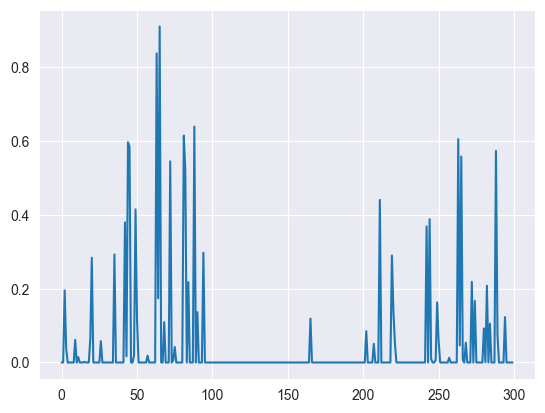

In [34]:
df["A.5_Expected Number of Deaths"].plot() 